Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 3: Stroj potpornih vektora i algoritam k-najbližih susjeda

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 9. studenog 2016.</i> 

Objavljeno: **9. studenog 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **14. studenog 2016.**

### Upute

Treća laboratorijska vježba sastoji se od sedam zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [9]:
import numpy as np
import scipy as sp
import pandas as pd
import mlutils as ml
import matplotlib.pyplot as plt
import itertools

%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### (a)

Upoznajte se s klasom [`svm.SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), koja ustvari implementira sučelje prema implementaciji [`libsvm`](http://www.csie.ntu.edu.tw/~cjlin/libsvm/). Primijenite model `SVC` s linearnom jezgrenom funkcijom (tj. bez preslikavanja primjera u prostor značajki) na skup podataka `seven` (dan niže) s $N=7$ primjera. Ispišite koeficijente $w_0$ i $\mathbf{w}$. Ispišite dualne koeficijente i potporne vektore. Završno, koristeći funkciju `mlutils.plot_2d_svc_problem` iscrtajte podatke, decizijsku granicu i marginu. Funkcija prima podatke, oznake i klasifikator (objekt klase `SVC`). Izračunajte širinu margine.

w = [-1.  0.]
w0 = [ 1.]
Dualni koeficijenti = [-0.5  0.5]
Potporni vektori =
[[ 2.  0.]
 [ 0.  0.]]
Sirina margine = 2.0


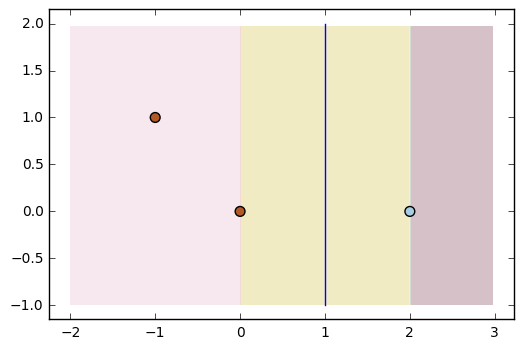

In [12]:
from sklearn.svm import SVC

def plot_decision(model, X):
    Ys = map(lambda x: x[1], X)
    fromY = min(Ys) - 1
    toY = max(Ys) + 1
    w = model.coef_[0]
    w0 = model.intercept_[0]
    a = -w[1] / w[0]
    xx = np.linspace(fromY, toY)
    yy = a * xx - (w0) / w[0]
    plt.plot(yy, xx)
    
seven_X = np.array([[0, 0], [-1, 1], [2, 0]])
seven_y = np.array([1, 1, -1])

svc = SVC(kernel='linear')
svc.fit(seven_X, seven_y)

ml.plot_2d_svc_problem(seven_X, seven_y, svc)
plot_decision(svc, seven_X)

print "w =", svc.coef_[0]
print "w0 =", svc.intercept_
print "Dualni koeficijenti =", svc.dual_coef_[0]
print "Potporni vektori =\n", svc.support_vectors_
print "Sirina margine =", 2 / sp.linalg.norm(svc.coef_)

**Q:** Koliko iznosi širina margine? <br>
**Q:** Koji primjeri su potporni vektori i zašto?

#### (b)

Definirajte funkciju `hinge(model, x, y)` koja izračunava gubitak zglobnice modela SVM (s linearnom jezgrom) na primjeru `x`. Izračunajte gubitke modela naučenog na skupu `seven` za primjere $\mathbf{x}^{(2)}=(3,2)$ i $\mathbf{x}^{(1)}=(3.5,2)$ koji su označeni pozitivno ($y=1$) te za $\mathbf{x}^{(3)}=(4,2)$ koji je označen negativno ($y=-1$). Također, izračunajte prosječni gubitak SVM-a na skupu `seven`. Uvjerite se da je rezultat identičan onome koji biste dobili primjenom ugrađene funkcije [`metrics.hinge_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html).

In [4]:
from sklearn.metrics import hinge_loss

def hinge(model, x, y):
    h = model.decision_function(x)
    return max(0, 1 - y * h)

def average_hinge_loss(model, X, Y):
    total_error = 0
    for x, y in zip(X, Y):
        total_error += hinge(model, x.reshape(1, -1), y)
    return total_error / len(X)
    
three_X = np.array([[3,2], [3.5,2], [4,2]])
three_y = np.array([1, 1, -1])

hinge_loss_three = np.array([hinge(svc, x.reshape(1, -1), y) for x, y in zip(three_X, three_y)])
print "Pogreska na skupu od tri primjera (rucno) =\n", hinge_loss_three

print "Prosjecni gubitak na skupu seven (rucno) =", average_hinge_loss(svc, seven_X, seven_y)[0]
print "Prosjecni gubitak na skupu seven (hinge_loss) =", hinge_loss(seven_y, svc.decision_function(seven_X))

Pogreska na skupu od tri primjera (rucno) =
[[  1.95312500e-04]
 [  5.00048828e-01]
 [  1.00009766e+00]]
Prosjecni gubitak na skupu seven (rucno) = 8.37053571429e-05
Prosjecni gubitak na skupu seven (hinge_loss) = 8.37053571429e-05


#### (c)

Vratit ćemo se na skupove podataka `outlier` ($N=8$) i `unsep` ($N=8$) iz prošle laboratorijske vježbe (dani niže) i pogledati kako se model SVM-a nosi s njima. Naučite ugrađeni model SVM-a (s linearnom jezgrom) na ovim podatcima i iscrtajte decizijsku granicu (skupa s marginom). Također ispišite točnost modela korištenjem funkcije [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [5]:
from sklearn.metrics import accuracy_score

outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

Tocnost modela = 1.0


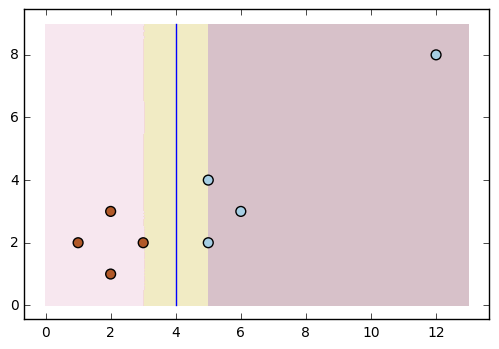

Tocnost modela = 0.875


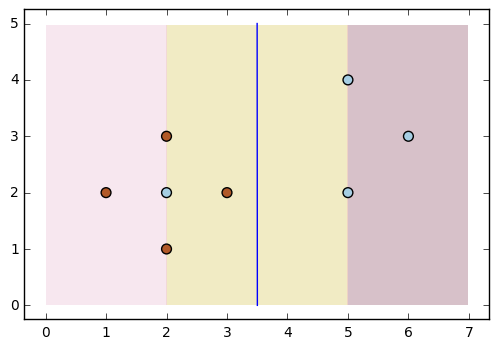

In [6]:
def transform(Y_pred):
    return map(lambda x: 1 if x > 0 else - 1, Y_pred)
def learn_and_plot(X, Y):
    model = SVC(kernel='linear')
    model.fit(X, Y)
    ml.plot_2d_svc_problem(X, Y, model)
    plot_decision(model, X)
    print "Tocnost modela =", accuracy_score(Y, transform(model.decision_function(X)))

learn_and_plot(outlier_X, outlier_y)
plt.show()
learn_and_plot(unsep_X, unsep_y)

**Q:** Zašto stršeća vrijednost ne utječe na SVM? <br>
**Q:** Kako se linearan SVM nosi s linearno neodvojivim skupom podataka? <br>
**Q:** Zašto SVM ipak uspjeva pronaći nekakvu granicu kod linearno neodvojivog problema, iako koristimo linearnu jezgru?

### 2. Nelinearan SVM

Ovaj zadatak pokazat će kako odabir jezgre utječe na kapacitet SVM-a. Na skupu `unsep` iz prošlog zadatka trenirajte tri modela SVM s različitim jezgrenim funkcijama: linearnom, polinomijalnom i radijalnom baznom (RBF) funkcijom. Varirajte parametar $C$ po vrijednostima $C\in\{10^{-2},1,10^2\}$, dok za ostale parametre (stupanj polinoma za polinomijalnu jezgru odnosno parametar $\gamma$ za jezgru RBF) koristite podrazumijevane vijednosti. Prikažite granice između klasa (i margine) na grafikonu organiziranome u polje $3x3$, gdje su stupci različite jezgre, a retci različite vrijednosti parametra $C$.

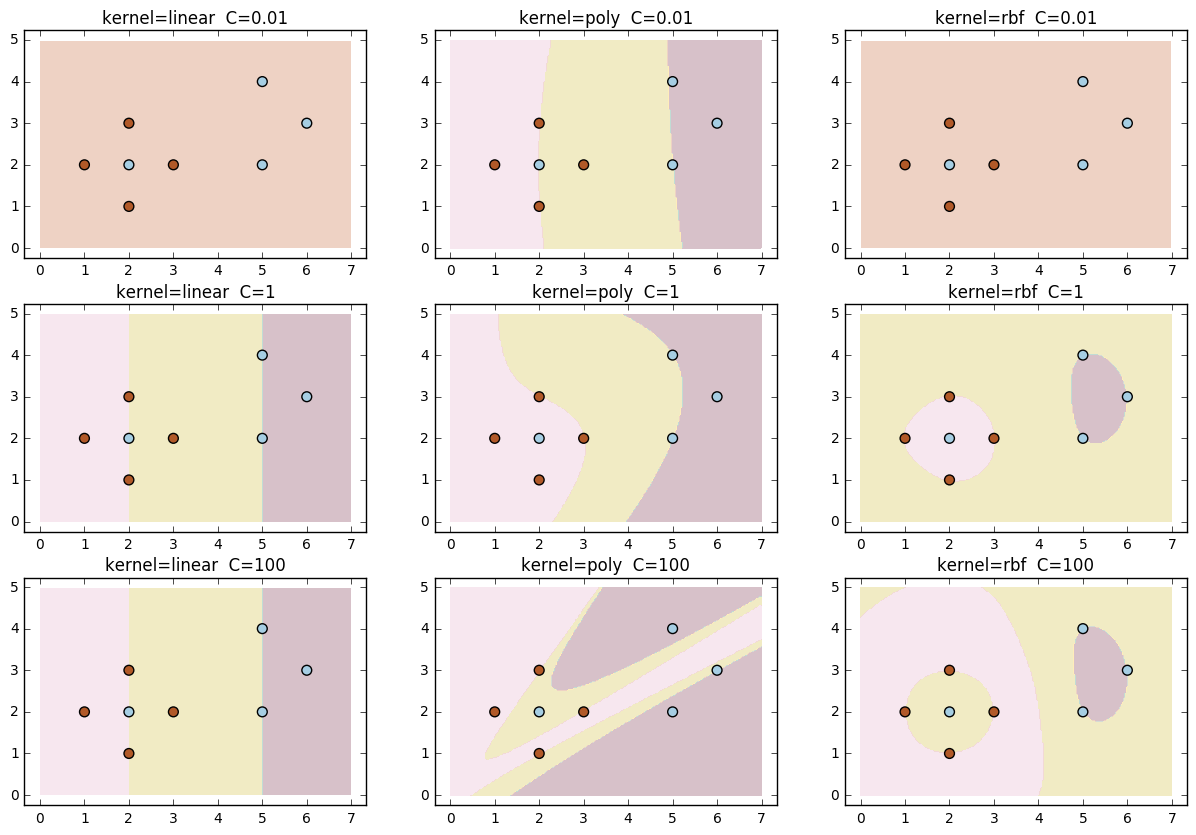

In [8]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

plt.figure(9, figsize=(15,10))
models = [SVC(kernel='linear'),SVC(kernel='poly'),SVC(kernel='rbf')]
Cs = [0.01,1,100]
combinations = itertools.product(Cs,models)

plt.figure(9, figsize=(15,10))
for k, (c, model) in zip(range(9), combinations):
    model.C = c
    model.fit(unsep_X, unsep_y)
    plt.subplot(3, 3, k+1)
    plt.title("kernel="+str(model.kernel)+"  C="+str(c))
    ml.plot_2d_svc_problem(unsep_X, unsep_y, model)

Decizijska granica

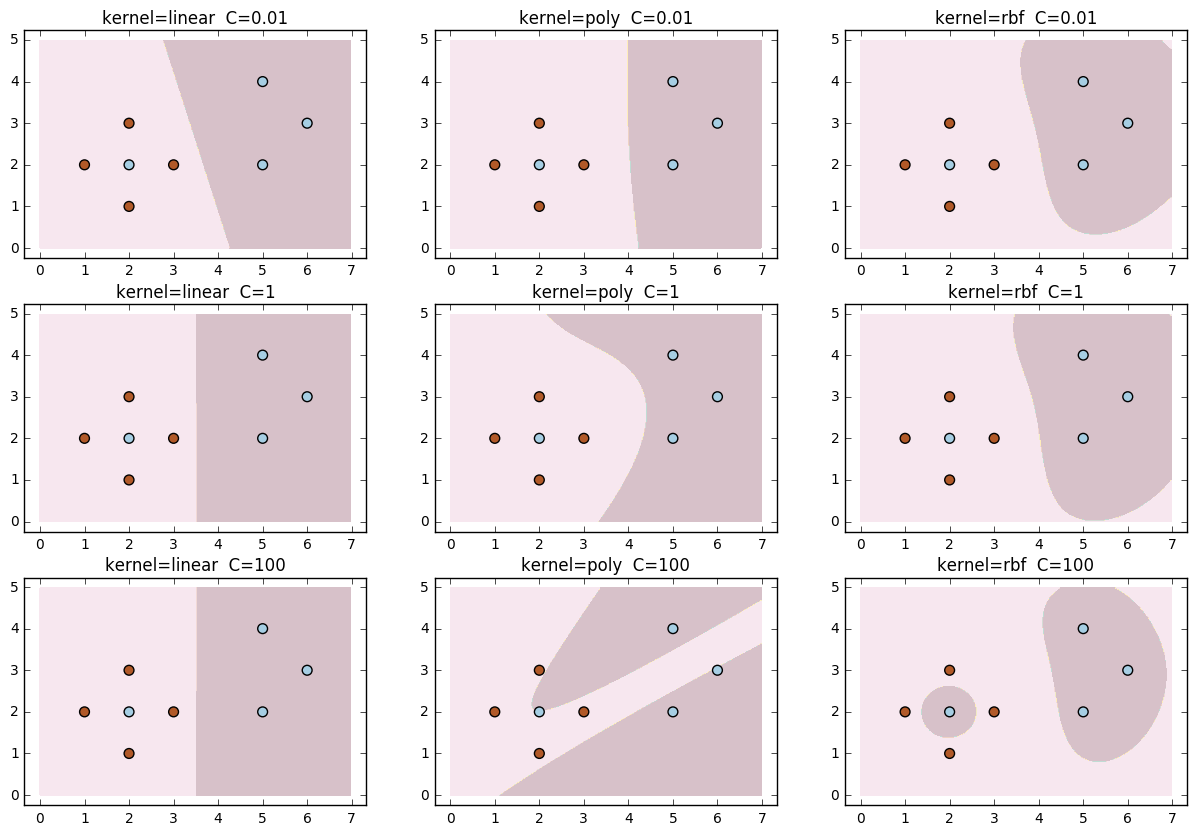

In [9]:
plt.figure(9, figsize=(15,10))
models = [SVC(kernel='linear'),SVC(kernel='poly'),SVC(kernel='rbf')]
Cs = [0.01,1,100]
combinations = itertools.product(Cs,models)
    
for k, (c, model) in zip(range(9), combinations):
    model.C = c
    model.fit(unsep_X, unsep_y)
    plt.subplot(3, 3, k+1)
    plt.title("kernel="+str(model.kernel)+"  C="+str(c))
    ml.plot_2d_clf_problem(unsep_X, unsep_y, model.predict)

### 3. Optimizacija hiperparametara SVM-a

Pored hiperparametra $C$, model SVM s jezgrenom funkcijom RBF ima i dodatni hiperparametar $\gamma=\frac{1}{2\sigma^2}$ (preciznost). Taj parametar također određuje složenost modela: velika vrijednost za $\gamma$ znači da će RBF biti uska, primjeri će biti preslikani u prostor u kojem su (prema skalarnome produktu) međusobno vrlo različiti, što će rezultirati složenijim modelima. Obrnuto, mala vrijednost za $\gamma$ znači da će RBF biti široka, primjeri će biti međusobno sličniji, što će rezultirati jednostavnijim modelima. To ujedno znači da, ako odabremo veći $\gamma$, trebamo jače regularizirati model, tj. trebamo odabrati manji $C$, kako bismo spriječili prenaučenost. Zbog toga je potrebno zajednički optimirati hiperparametre $C$ i $\gamma$, što se tipično radi iscrpnim pretraživanjem po rešetci (engl. *grid search*). Ovakav pristup primjenjuje se kod svih modela koji sadrže više od jednog hiperparametra.


#### (a)

Definirajte funkciju 

> `grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False)` 

koja optimizira parametre $C$ i $\gamma$ pretraživanjem po rešetci. Funkcija treba pretražiti parametre $C\in\{2^{c_1},2^{c_1+1},\dots,2^{c_2}\}$ i $\gamma\in\{2^{g_1},2^{g_1+1},\dots,2^{g_2}\}$. Funkcija treba vratiti optimalne parametre $(C^*,\gamma^*)$, tj. one za koje na skupu za provjeru model ostvaruju najmanju pogrešku. Dodatno, ako je `surface=True`, funkcija treba vratiti matrice (tipa `ndarray`) pogreške modela (očekivanje gubitka 0-1) na skupu za učenje i skupu za provjeru. Svaka je matrica dimenzija $(c_2-c_1+1)\times(g_2-g_1+1)$ (retci odgovaraju različitim vrijednostima za $C$, a stupci različitim vrijednostima za $\gamma$).

In [10]:
from sklearn.metrics import accuracy_score, zero_one_loss

def grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False):
    model = SVC(kernel='rbf')
    errors_train = np.zeros((c2-c1+1, g2-g1+1))
    errors_valid = np.zeros((c2-c1+1, g2-g1+1))
    min_error = -1
    best_c, best_g = c1, g1
    for c, g in itertools.product(np.arange(c1, c2+1), np.arange(g1, g2+1)):
        model.set_params(C=2**c, gamma=2**g)
        model.fit(X_train, y_train)
        
        errors_train[c-c1, g-g1] = zero_one_loss(y_train, model.predict(X_train))
        error_valid = zero_one_loss(y_validate, model.predict(X_validate))
        errors_valid[c-c1, g-g1] = error_valid
        if min_error < 0 or error_valid < min_error:
            min_error = error_valid
            best_c, best_g = c, g
            
    C, gamma = 2**(best_c), 2**(best_g)
    if error_surface:
        return C, gamma, errors_train, errors_valid
    else:
        return C, gamma

#### (b)

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte **dva** skupa podataka od $N=200$ primjera: jedan s $n=2$ dimenzije i drugi s $n=1000$ dimenzija. Primjeri neka dolaze iz dviju klasa, s time da svakoj klasi odgovaraju dvije grupe (`n_clusters_per_class=2`), kako bi problem bio nešto složeniji, tj. nelinearniji. Neka sve značajke budu informativne. Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1.

Na oba skupa optimirajte SVM s jezgrenom funkcijom RBF, u rešetci $C\in\{2^{-5},2^{-4},\dots,2^{15}\}$ i $\gamma\in\{2^{-15},2^{-14},\dots,2^{3}\}$. Prikažite površinu pogreške modela na skupu za učenje i skupu za provjeru, i to na oba skupa podataka (ukupno četiri grafikona) te ispišite optimalne kombinacije hiperparametara. Prikažite i granicu između klasa za dvodimenzijski skup. Za prikaz površine pogreške modela možete koristiti funkciju `plot_error_surface` iz paketa `mlutils`.

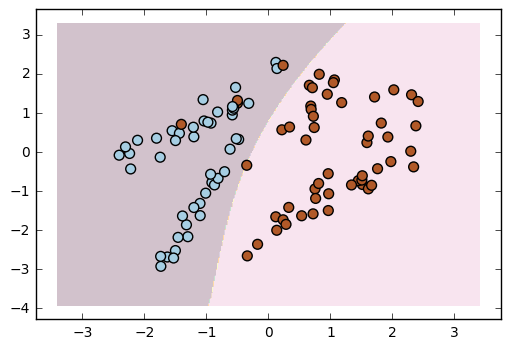

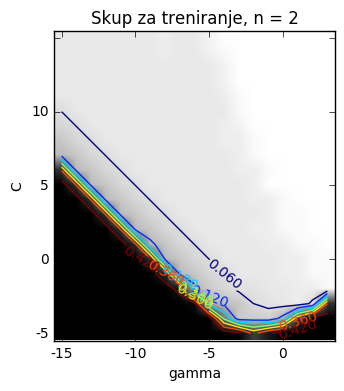

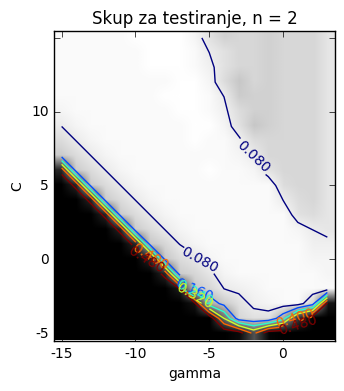

C = 64 , gamma = 0.03125


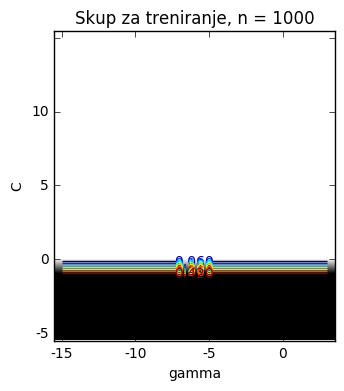

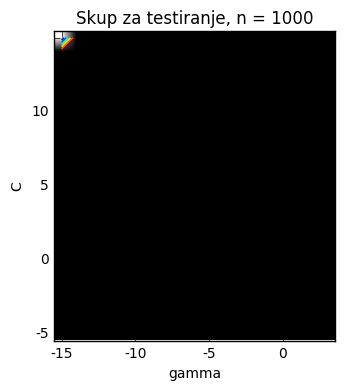

C = 0.03125 , gamma = 3.0517578125e-05


In [11]:
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split

Cs, Gs = (-5, 15) ,(-15, 3)

for n in [2, 1000]:
    X_set, y_set = make_classification(n_samples=200, n_features=n, n_informative=n, n_classes=2, n_clusters_per_class=2, n_redundant=0, random_state=16)
    X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.5, random_state=12)
    C, gamma, train_error, test_error = grid_search(X_train, X_test, y_train, y_test, Cs, Gs, error_surface=True)

    if n == 2:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        ml.plot_2d_clf_problem(X_test, y_test, model.predict)
        plt.show()
        
    plt.title("Skup za treniranje, n = "+ str(n))
    ml.plot_error_surface(train_error, Cs, Gs)
    plt.show()
    
    # Hacky way to silent plt.scatter error in mlutils
    test_error[20][0] -= 0.000000001
    plt.title("Skup za testiranje, n = " + str(n))
    ml.plot_error_surface(test_error, Cs, Gs)
    plt.show()
    print "C =", C, ", gamma =", gamma

**Q:** Razlikuje li se površina pogreške na skupu za učenje i skupu za ispitivanje? Zašto? <br>
**Q:** U prikazu površine pogreške, koji dio površine odgovara prenaučenosti, a koji podnaučenosti? Zašto? <br>
**Q:** Kako broj dimenzija $n$ utječe na površinu pogreške, odnosno na optimalne hiperparametre $(C^*, \gamma^*)$? <br>
**Q:** Preporuka je da povećanje vrijednosti za $\gamma$ treba biti popraćeno smanjenjem vrijednosti za $C$. Govore li vaši rezultati u prilog toj preporuci? Obrazložite. <br>
**Q:** Podrazumijevana vrijednost parametara je $C=1$ i $\gamma=1/n$. Bi li te vrijednosti bile optimalne u ovom slučaju?

### 4. Utjecaj standardizacije značajki kod SVM-a

Za mnoge je modele bitno prije treniranja skalirati značajke, kako bi se spriječilo da značajke s većim numeričkim rasponima dominiraju nad onima s manjim numeričkim rasponima. To vrijedi i za SVM, kod kojega skaliranje nerijetko može znatno poboljšati rezultate. Svrha ovog zadataka jest eksperimentalno utvrditi utjecaj skaliranja značajki na točnost SVM-a.

Generirat ćemo dvoklasni skup od $N=500$ primjera s $n=2$ značajke, tako da je dimenzija $x_1$ većeg iznosa i većeg raspona od dimenzije $x_0$, te ćemo dodati jedan primjer koji vrijednošću značajke $x_1$ odskače od ostalih primjera:

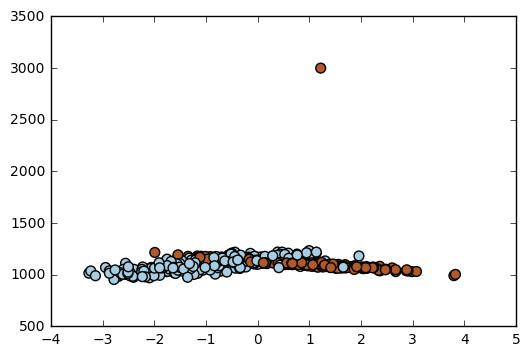

In [12]:
from sklearn.datasets import make_classification

def generate_dataset():
    X, y = make_classification(n_samples=500,n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=1)
    X[:,1] = X[:,1]*100+1000
    X[0,1] = 3000
    return X, y

X, y = generate_dataset()
ml.plot_2d_svc_problem(X, y)

#### (a)

Proučite funkciju za iscrtavanje histograma [`hist`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ (ovdje i u sljedećim zadatcima koristite `bins=50`).

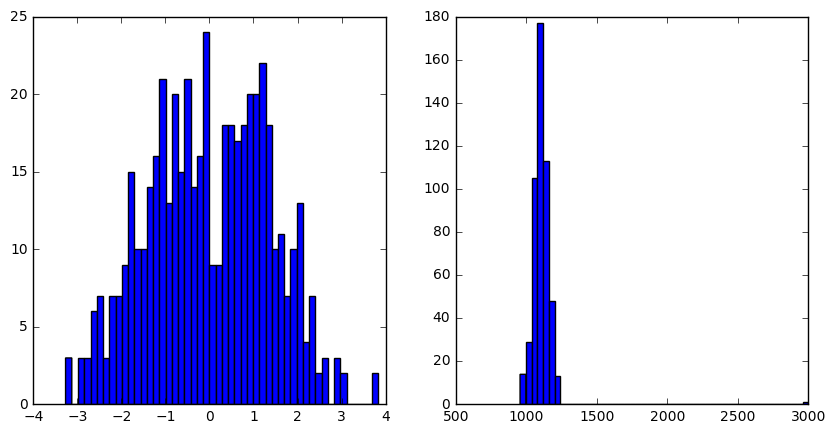

In [14]:
def plot_hist(Z):
    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1), plt.hist(Z[:,0], bins=50)
    plt.subplot(1,2,2), plt.hist(Z[:,1], bins=50)
plot_hist(X)

#### (b)

Proučite razred [`preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane min-max skaliranjem (ukupno dva histograma).

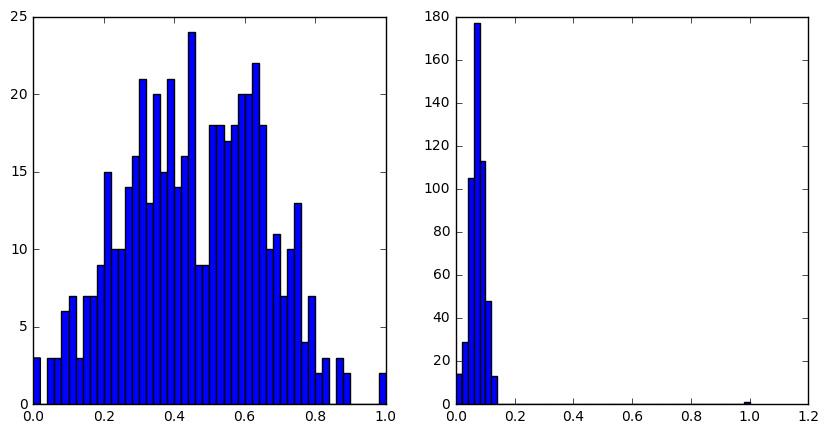

In [15]:
from sklearn.preprocessing import MinMaxScaler

min_max_X = MinMaxScaler().fit_transform(X)
plot_hist(min_max_X)

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (c)

Proučite razred [`preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane standardnim skaliranjem (ukupno dva histograma).

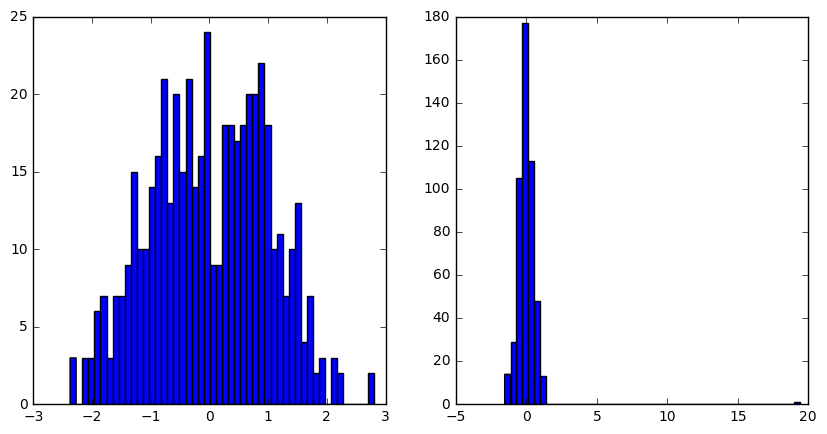

In [16]:
from sklearn.preprocessing import StandardScaler

plot_hist(StandardScaler().fit_transform(X))

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (d)

Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1. Trenirajte SVM s jezgrenom funkcijom RBF na skupu za učenje i ispitajte točnost modela na skupu za ispitivanje, koristeći tri varijante gornjeg skupa: neskalirane značajke, standardizirane značajke i min-max skaliranje. Koristite podrazumijevane vrijednosti za $C$ i $\gamma$. Izmjerite točnost svakog od triju modela na skupu za učenje i skupu za ispitivanje. Ponovite postupak više puta (npr. 30) te uprosječite rezultate (u svakom ponavljanju generirajte podatke kao što je dano na početku ovog zadatka).


**NB:** Na skupu za učenje treba najprije izračunati parametre skaliranja te zatim primijeniti skaliranje (funkcija `fit_transform`), dok na skupu za ispitivanje treba samo primijeniti skaliranje s parametrima koji su dobiveni na skupu za učenje (funkcija `transform`).

In [17]:
model = SVC(kernel='rbf')
scalers = [None, StandardScaler(), MinMaxScaler()]
names = ["Bez skaliranja", "Standard", "MinMax"]

count = 30
for name, scale in zip(names, scalers):
    test_error, train_error = 0, 0
    for i in range(count):
        X, y = generate_dataset()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
        X_train = scale.fit_transform(X_train) if scale else X_train
        X_test = scale.transform(X_test) if scale else X_test
        model.fit(X_train, y_train)
        train_error += zero_one_loss(y_train, model.predict(X_train))
        test_error += zero_one_loss(y_test, model.predict(X_test))
    print "Tip skaliranja:", name
    print "Train error =", train_error / count
    print "Test error =", test_error / count
    print "\n"

Tip skaliranja: Bez skaliranja
Train error = 0.0162666666667
Test error = 0.169733333333


Tip skaliranja: Standard
Train error = 0.0458666666667
Test error = 0.052


Tip skaliranja: MinMax
Train error = 0.098
Test error = 0.104133333333




**Q:** Jesu li rezultati očekivani? Obrazložite. <br>
**Q:** Bi li bilo dobro kada bismo funkciju `fit_transform` primijenili na cijelom skupu podataka? Zašto? Bi li bilo dobro kada bismo tu funkciju primijenili zasebno na skupu za učenje i zasebno na skupu za ispitivanje? Zašto?

### 5. k-najbližih susjeda

U ovom zadatku promatrat ćemo jednostavan klasifikacijski model imena **algoritam k-najbližih susjeda**. Najprije ćete ga samostalno isprogramirati kako biste se detaljno upoznali s radom ovog modela, a zatim ćete prijeći na analizu njegovih hiperparametara (koristeći ugrađeni razred, zbog efikasnosti).

#### (a)

Implementirajte klasu `KNN` koja implementira algoritam $k$ najbližih susjeda. Neobavezan parametar konstruktora jest broj susjeda `n_neighbours` ($k$), čija je podrazumijevana vrijednost 3. Definirajte metode `fit(X, y)` i `predict(X)`, koje služe za učenje modela odnosno predikciju. Kao mjeru udaljenosti koristite euklidsku udaljenost ([`scipy.linalg.norm`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.norm.html); pripazite na parametar `axis`). Nije potrebno implementirati nikakvu težinsku funkciju.

In [18]:
from scipy.linalg import norm
from collections import Counter

class KNN:
    def __init__(self, n_neighbors=3):
        self.k = n_neighbors
    
    def _distances(self, x):            
        distances = [(sample, norm(x - sample[0])) for sample in self.training_set]
        return sorted(distances, key=lambda x: x[1])

    def _neighbours(self, x):            
        k_neighbours = self._distances(x)[:self.k]
        return [x[0] for x in k_neighbours]
    
    def _majority_vote(self, neighbours):
        classes = [neighbour[1] for neighbour in neighbours]
        count = Counter(classes)
        return count.most_common()[0][0]

    def fit(self, X_train, y_train):
        self.X_train, self.y_train = X_train, y_train
        self.training_set = zip(X_train, y_train)
        
    def predict(self, X_test):
        predicted = np.empty(X_test.shape[0], dtype=self.y_train[0].dtype)
        for i, x in enumerate(X_test):
            predicted[i] = self._majority_vote(self._neighbours(x))
        return predicted

#### (b)

Kako biste se uvjerili da je Vaša implementacija ispravna, usporedite ju s ugrađenom implementacijom u razredu [`neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Budući da spomenuti razred koristi razne optimizacijske trikove pri pronalasku najboljih susjeda, obavezno postavite parametar `algorithm=brute`, jer bi se u protivnom moglo dogoditi da Vam se predikcije razlikuju. Usporedite modele na sljedećem (umjetnom) skupu podataka:

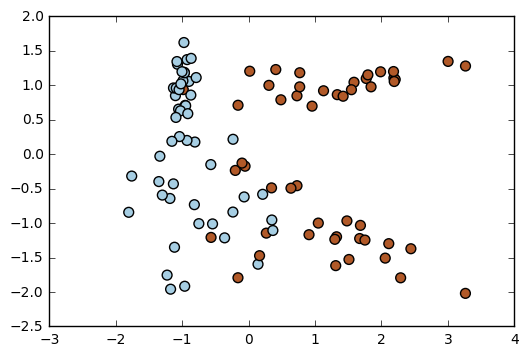

In [19]:
from sklearn.datasets import make_classification
X_art, y_art = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
ml.plot_2d_clf_problem(X_art, y_art)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

my_knn = KNN(n_neighbors=10)
my_knn.fit(X_art, y_art)
my_predict = my_knn.predict(X_art)

py_knn = KNeighborsClassifier(n_neighbors=10, algorithm='brute')
py_knn.fit(X_art, y_art)
py_predict = py_knn.predict(X_art)

if np.array_equal(my_predict, py_predict):
    print "Obje inacice kNN-a daju iste rezultate"
else:
    print "Obje inacice kNN-a ne daju iste rezultate"

Obje inacice kNN-a daju iste rezultate


#### (c)

Pomoću funkcije `mlutils.plot_2d_clf_problem` iscrtajte prostor primjera i područja koja odgovaraju prvoj odnosno drugoj klasi. Eksperimentirajte s različitim vrijednostima za broj primjera $N$, broj susjeda $k$ i broj klasa $K$.

**NB:** Implementacija algoritma `KNeighborsClassifier` iz sklearna vjerojatno će raditi brže od Vaše implementacije, pa koristite nju za iscrtavanje grafa. Naime, za iscrtavanje grafa potrebno je napraviti predikciju za svaku točku u regiji iscrtavanja.

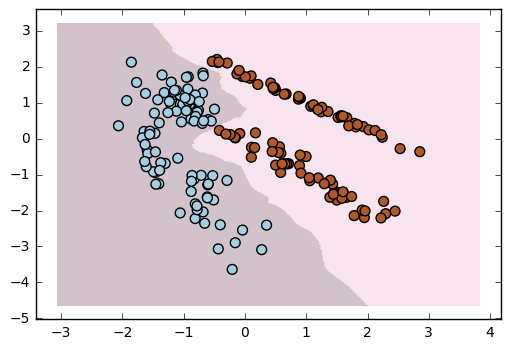

In [21]:
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
ml.plot_2d_clf_problem(X, y, lambda x: knn.predict(x))

**Q:** Kako $k$ utječe na izgled granice između klasa? A broj primjera $N$?

### 6. Analiza algoritma k-najbližih susjeda

Algoritam k-nn ima hiperparametar $k$ (broj susjeda). Taj hiperparametar izravno utječe na složenost algoritma, pa je stoga izrazito važno dobro odabrati njegovu vrijednost. Kao i kod mnogih drugih algoritama, tako i kod algoritma k-nn optimalna vrijednost hiperametra $k$ ovisi o konkretnom problemu, uključivo broju primjera $N$, broju značajki (dimenzija) $n$ te broju klasa $K$.

#### (a)

Kako bismo dobili pouzdanije rezultate, potrebno je mjerenja ponoviti na različitim skupovima podataka i zatim uprosječiti dobivene vrijednosti pogrešaka. Definirajte funkciju

> `knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100)`

koja trenira i ispituje model k-nn na ukupno `n_instances` primjera, i to tako da za svaku vrijednost hiperparametra iz zadanog intervala `k_range` ponovi `n_trials` mjerenja, generirajući za svako od njih nov skup podataka pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) i dijeleći ga na skup za učenje i skup za ispitivanje koristeći funkciju [`sklearn.cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Udio skupa za ispitivanje definiran je parametrom `test_size`. Vrijednosti parametara `n_instances`, `n_features`, `n_classes` i `n_informative` proslijedite funkciji `make_classification` te dodatno postavite `n_redundant=0` i `n_clusters_per_class=1`. Povratne vrijednosti funkcije jest trojka `(best_k, train_errors, test_errors)`. Vrijednost `best_k` je optimalna vrijednost hiperparametra $k$ (vrijednost za koju je pogreška na skupu za ispitivanje najmanja). Vrijednosti `train_errors` i `test_errors`  liste su pogrešaka na skupu za učenja odnosno skupu za testiranje za sve razmatrane vrijednosti hiperparametra $k$.

In [22]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import zero_one_loss

def generate_dataset_6(n_instances, n_features, n_classes, n_informative, test_size):
    X_, y_ = make_classification(n_samples=n_instances, n_features=n_features, n_classes=n_classes, n_informative=n_informative,
                                 n_redundant=0, n_clusters_per_class=1)
    
    return train_test_split(X_, y_, test_size=test_size)
    
    
def knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100):
    train_errors = np.zeros(k_range[1] - k_range[0] + 1)
    test_errors = np.zeros(k_range[1] - k_range[0] + 1)
    ks = np.arange(k_range[0], k_range[1] + 1)
    for j in range(0, n_trials):
        X_train, X_test, y_train, y_test = generate_dataset_6(n_instances, n_features, n_classes, 
                                                              n_informative, test_size)
        for i, k in enumerate(ks):
            knc = KNeighborsClassifier(n_neighbors=k)
            knc.fit(X_train, y_train)
            train_errors[i] += zero_one_loss(y_train, knc.predict(X_train))
            test_errors[i] += zero_one_loss(y_test, knc.predict(X_test))
    train_errors /= n_trials
    test_errors /= n_trials
    best_k = ks[argmin(test_errors)]
    return (best_k, train_errors, test_errors)

#### (b)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogrešku učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=200$ primjera. Ispišite i optimalnu vrijednost za $k$.

Najbolji k = 5


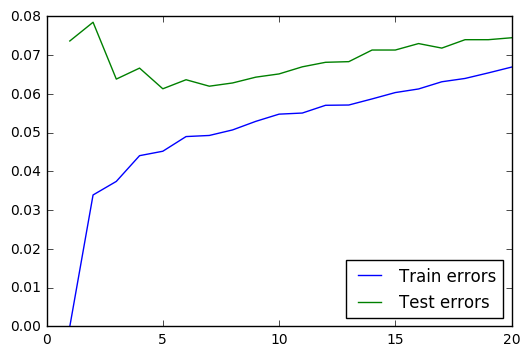

In [23]:
best_k, train_errors, test_errors = knn_eval(200)
plt.plot(np.arange(1,21), train_errors, label="Train errors")
plt.plot(np.arange(1,21), test_errors, label="Test errors")
plt.legend(loc="best")
print "Najbolji k =", best_k

**Q:** Kojem području odgovara prenaučenost, a kojem podnaučenost modela? Zašto? <br>
**Q:** Je li uvijek moguće doseći pogrešku od 0 na skupu za učenje?

#### (c)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=\{100, 500, 1000, 3000\}$ primjera. Načinite 4 zasebna grafikona (generirajte ih u 2x2 polju). U svakoj iteraciji ispišite optimalnu vrijednost hiperparametra $k$ (najlakše kao naslov grafikona).

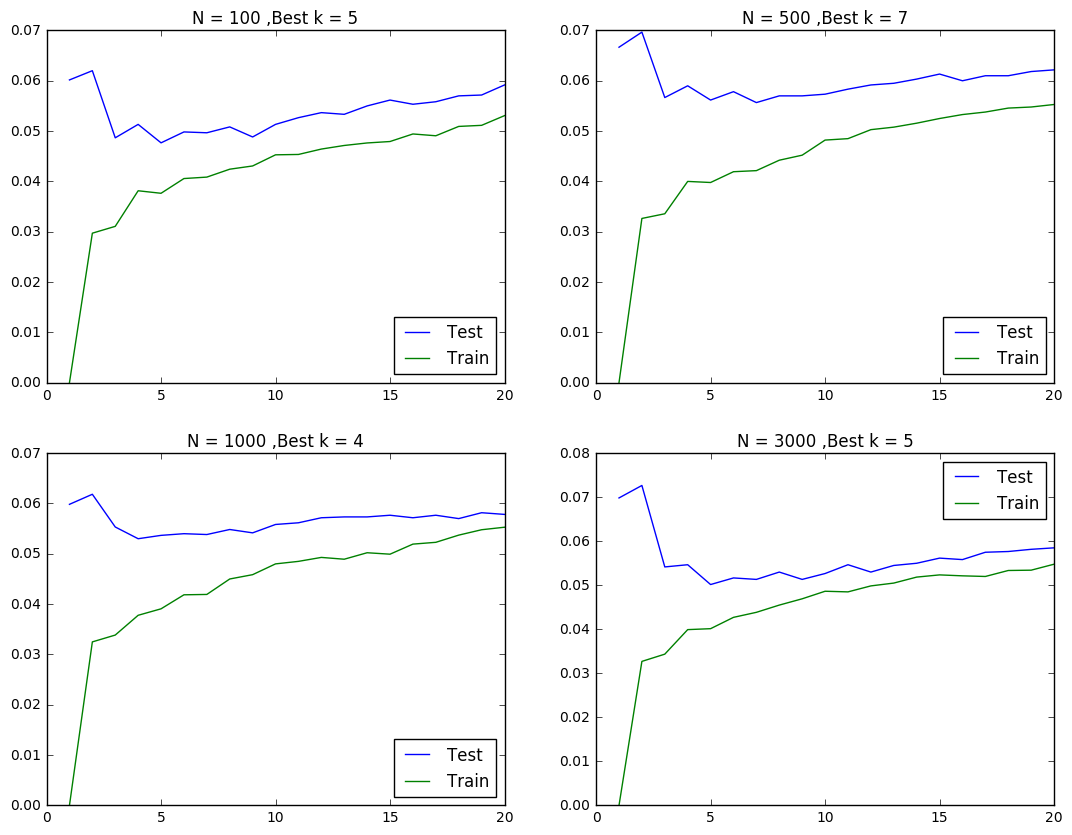

In [24]:
Ns = [100, 500, 1000, 3000]
plt.figure(4, figsize=(13,10))
for i, N in enumerate(Ns):
    best_k, train_errors, test_errors = knn_eval(200)
    
    plt.subplot(2, 2, i+1)
    plt.title("N = " + str(N) + " ,Best k = " + str(best_k))
    plt.plot(np.arange(1,21), test_errors, label="Test")
    plt.plot(np.arange(1,21), train_errors, label="Train")
    plt.legend(loc="best")

### 7. Nerobusnost algoritma k-nn

Svrha ovog zadatka jest analizirati u kojoj je mjeri algoritam k-nn osjetljiv na razlike u mjernoj skali između pojedinih dimenzija te na prisutnost nebitnih značajki.

#### (a)

Krenite od umjetnog skupa podataka danog u nastavku. Zatim napravite kopiju tog skupa podataka (pogledajte [`copy.deepcopy`](https://docs.python.org/2/library/copy.html#copy.deepcopy)) i preinačite ju tako da jednu dimenziju pomnožite sa 100. Oba skupa podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3, pri čemu obratite pozornost na to da oba skupa podijelite na identičan način. Trenirajte modele k-nn na skaliranoj i neskaliranoj inačici skupa za učenje (s pretpostavljenim parametrima), a zatim ispitajte model na odgovarajućim ispitnim inačicama skupova.

In [25]:
from copy import deepcopy
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)

X_c, y_c = deepcopy(X), deepcopy(y)
X_c[:,1] *= 100 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_c, y_c, test_size=0.3, random_state = 42)

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
print "Greska na normalnom skupu =", zero_one_loss(y_test, knc.predict(X_test))
knc.fit(Xc_train, yc_train)
print "Greska na skaliranom skupu =", zero_one_loss(yc_test, knc.predict(Xc_test))

Greska na normalnom skupu = 0.0333333333333
Greska na skaliranom skupu = 0.45


**Q:** Zašto je ovaj problem tako izražen kod algoritma k-nn?

#### (b)

Kako bismo provjerili u kojoj je mjeri algoritam k-nn osjetljiv na prisustvo nebitnih značajki, možemo iskoristiti funkciju `make_classification` kako bismo generirali skup primjera kojemu su neke od značajki nebitne. Naime, parametar `n_informative` određuje broj bitnih značajki, dok parametar `n_features` određuje ukupan broj značajki. Ako je `n_features > n_informative`, onda će neke od značajki biti nebitne. Umjesto da izravno upotrijebimo funkciju `make_classification`, upotrijebit ćemo funkciju `knn_eval` iz zadatka (7a), jer ćemo na taj način dobiti pouzdanije procjene.

Koristite funkciju `knn_eval` na dva načina. U oba koristite $N=1000$ primjera, $n=10$ značajki i $K=5$ klasa, ali za prvi neka su svih 10 značajki bitne, a za drugi neka je bitno samo 5 od 10 značajki. Ispišite pogreške učenja i ispitivanja za oba modela za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja).

In [28]:
for n_i in [10, 5]:
    ks = np.arange(1, 21)
    best_k, train_errors, test_errors = knn_eval(1000, n_features=10, n_classes=5, n_informative=n_i) 
    print "Broj bitnih znacajki", n_i
    print "Pogreska na skupu za ucenje =", train_errors[best_k - 1]
    print "Pogreska na ispitnom skupu =", test_errors[best_k - 1]

Broj bitnih znacajki 10
Pogreska na skupu za ucenje = 0.0955285714286
Pogreska na ispitnom skupu = 0.130266666667
Broj bitnih znacajki 5
Pogreska na skupu za ucenje = 0.167228571429
Pogreska na ispitnom skupu = 0.199133333333


**Q:** Zašto nebitne značajke ovoliko utječu na perfomanse modela?